<a href="https://colab.research.google.com/github/weberton/machine-learning-module2/blob/main/StandardScaler_e_MinMaxScaler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('Churn_Modelling.csv', sep=';')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(9865, 14)

* 14 features(colunas)
* As colunas possuem proporções/escalas diferentes, por exemplo, `idade`, `salário`, `credit score` dentre outras.
* Vamos plotar um gráfico com o credit score para avaliar os outliers.
* As bolinhas na parte inferior do gráfico são outliers.
* A mediana é a linha laranja



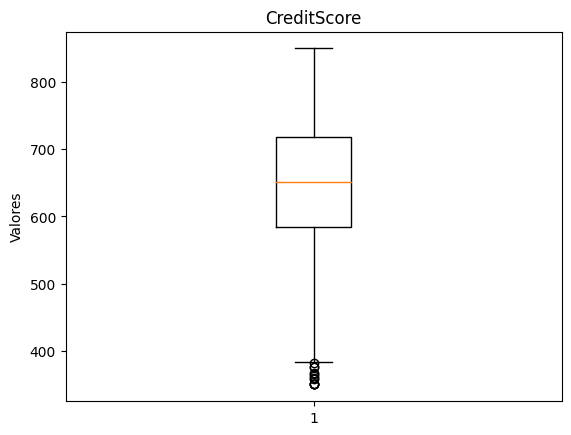

In [ ]:
import matplotlib.pyplot as plt

#criar o gráfico de boxplot
plt.boxplot(df['CreditScore'])
plt.title('CreditScore')
plt.ylabel('Valores')
plt.show()

In [ ]:
print(df['CreditScore'].min())
print(df['CreditScore'].max())


350
850


**Criano o boxplot para a idade**
* Observe os outlier para idade

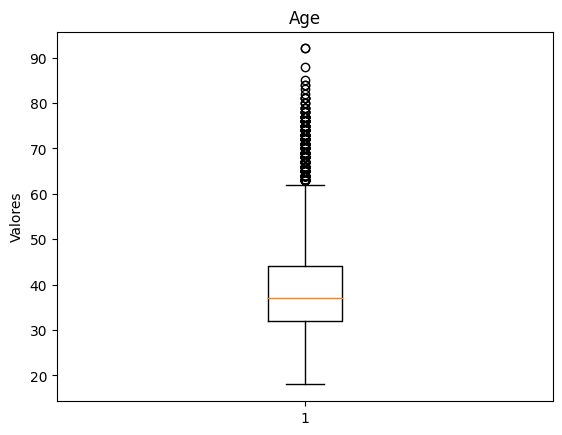

In [ ]:
plt.boxplot(df['Age'])
plt.title('Age')
plt.ylabel('Valores')
plt.show()

In [ ]:
print(df['Age'].min())
print(df['Age'].max())

18
92


**Criando o gráfico para a variável Tenure.**

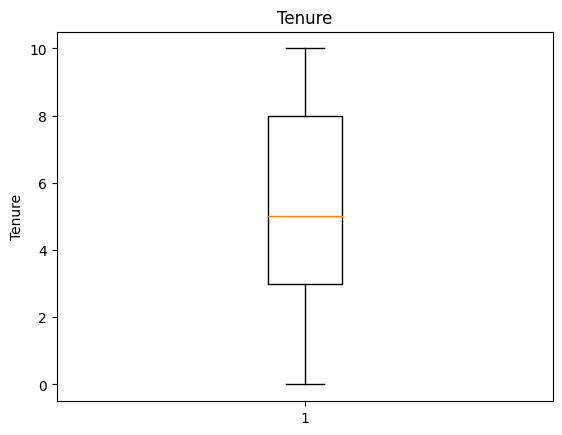

In [ ]:
plt.boxplot(df['Tenure'])
plt.title('Tenure')
plt.ylabel('Tenure')
plt.show()

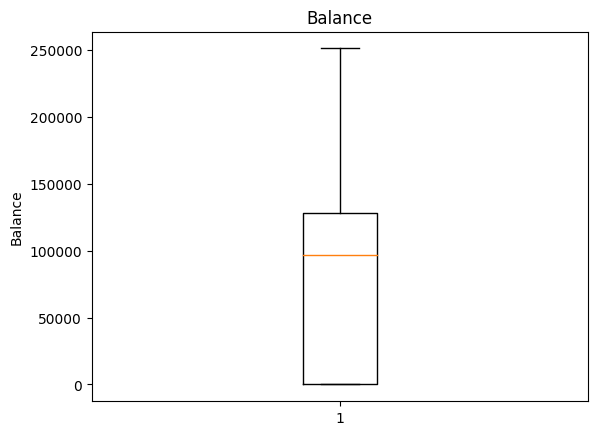

In [ ]:
plt.boxplot(df['Balance'])
plt.title('Balance')
plt.ylabel('Balance')
plt.show()

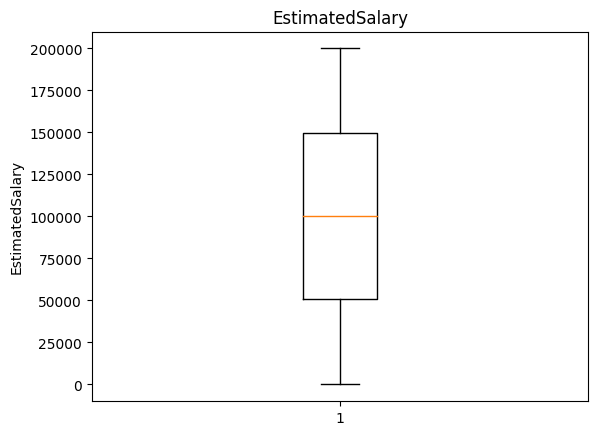

In [ ]:
plt.boxplot(df['EstimatedSalary'])
plt.title('EstimatedSalary')
plt.ylabel('EstimatedSalary')
plt.show()

**Observem que as escalas dos valores são bem diferentes**

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Vamos agorar criar um código para as variáveis de texto.**

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_enconder = LabelEncoder()

#ajustar e transformar os rótulos
df['Surname'] = label_enconder.fit_transform(df['Surname'])
df['Geography'] = label_enconder.fit_transform(df['Surname'])
df['Gender'] = label_enconder.fit_transform(df['Surname'])

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1111,619,1111,1111,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1173,608,1173,1173,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2032,502,2032,2032,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,289,289,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,1816,850,1816,1816,43,2,125510.82,1,1,1,79084.10,0


**Criando os dados de treino e teste**

In [ ]:
from sklearn.model_selection import train_test_split

SEED=42

x = df.drop(columns=['Exited']) #remove a coluna exited do X
y = df['Exited']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=SEED)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler() #chamando o metodo de normalizacao dos dados (0-1). Min e max scaler

# aplicar apenas na base de trieno e nao na de teste. Evita o data leak e um vies
scaler.fit(x_train)

x_train_min_max_scaled = scaler.transform(x_train)
x_test_min_max_scaled = scaler.transform(x_test)

In [ ]:
x_train_min_max_scaled

array([[0.35201121, 0.11669547, 0.88507719, ..., 1.        , 0.        ,
        0.34768845],
       [0.60456274, 0.78062996, 0.35849057, ..., 1.        , 0.        ,
        0.46923837],
       [0.89393636, 0.07744496, 0.17495712, ..., 0.        , 1.        ,
        0.56001428],
       ...,
       [0.53922353, 0.03258209, 0.5626072 , ..., 0.        , 0.        ,
        0.46092526],
       [0.08595157, 0.96788994, 0.59691252, ..., 1.        , 0.        ,
        0.48738065],
       [0.7273364 , 0.56228399, 0.84425386, ..., 1.        , 1.        ,
        0.26761502]])

In [ ]:
scaler = StandardScaler()

scaler.fit(x_train)

x_train_standard_scaler = scaler.transform(x_train)
x_test_standard_scaler = scaler.transform(x_test)

In [ ]:
x_train_standard_scaler

array([[-0.50073964, -1.33102082,  1.28295781, ...,  0.64920701,
        -1.04034701, -0.53624445],
       [ 0.38340744,  0.98483691, -0.54107698, ...,  0.64920701,
        -1.04034701, -0.11539063],
       [ 1.39646344, -1.46792981, -1.17681548, ..., -1.54034073,
         0.96121774,  0.19891141],
       ...,
       [ 0.15466416, -1.62441517,  0.16595931, ..., -1.54034073,
        -1.04034701, -0.1441739 ],
       [-1.43217667,  1.63801503,  0.28478893, ...,  0.64920701,
        -1.04034701, -0.05257492],
       [ 0.81322062,  0.22322832,  1.14155055, ...,  0.64920701,
         0.96121774, -0.81349026]])

**Vamos testar com o KNN utilizando os dados não normalizados**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Inicialiar o modelo SVM para classificação SVC
model = KNeighborsClassifier(n_neighbors=3)

#Treinar o modelo
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia:  {accuracy:.2f}')

Acurácia:  0.76


**Vamos testar o código agora com o MinManx scaler**

In [ ]:
model_min_max = KNeighborsClassifier(n_neighbors=3)

#Treinar o modelo
model_min_max.fit(x_train_min_max_scaled, y_train)

y_pred_min_max = model.predict(x_test_min_max_scaled)

accuracy_min_max = accuracy_score(y_test, y_pred_min_max)
print(f'Acurácia:  {accuracy_min_max:.2f}')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Acurácia:  0.81


**Vamos testar com o StandardScalar**

In [ ]:
model_standard = KNeighborsClassifier(n_neighbors=3)

#Treinar o modelo
model_standard.fit(x_train_standard_scaler, y_train)

y_pred_standard = model.predict(x_test_standard_scaler)

accuracy_standard = accuracy_score(y_test, y_pred_standard)
print(f'Acurácia:  {accuracy_standard:.2f}')

Acurácia:  0.81


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
